In [3]:
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tutorial 1:  Quantum Approximate Optimization Algorithm 

<div style="text-align: justify"> 

One of the areas of quantum computing is modeling and solving combinatorial optimization problems, the importance of knowing the structure of the model to be represented in a quantum circuit and to be able to find the optimal states that satisfy the cost function in a hybrid way employing a classical optimizer. In recent years there have been increasing proposals through various research and applications to solve problems of this style using quantum computing, in this tutorial is based on the generation and solution of the MaxCut problem developed in the OpenQAOA SDK.
</div>

### Table of Contents

* [Introduction](#Introduction)
* [Combinatorial Optimization Problem](#combination)
* [QAOA](#QAOA)
* [Max-Cut](#Maxcut)
* [Max-Cut with QAOA](#Implementation)
* [References](#References)


# <a class="anchor" id="Introduction"> </a>Introduction

The Quantum Approximate Optimization Algorithm (QAOA) is a hybrid quantum-classical variational algorithm designed to tackle combinatorial optimization problems [[1]](#References), also is one of the most relevant algorithms in quantum computing for demonstrating quantum supremacy by decreasing the time complexity of combinatorial problems with respect to its classical part. QAOA as its name indicates is an approximation algorithm, so it will give us at the end of the process a series of states with higher probability of being the correct one. 


# <a class="anchor" id="combination"> </a> Combinatorial Optimization Problem

<div style="text-align: justify"> 

This area of computation is based on different problems whose purpose is to search for one or multiple states of a finite set that satisfy characteristics, conditions, and constraints.  In OpenQAOA are implemented some problems such as 


- Travel Sales Problem
- NumberPartition
- MaximumCut
- Knapsack 
- SlackFreeKnapsack
- MinimumVertexCover

</div>



# <a class="anchor" id="QAOA"> </a>QAOA


In order to implement the QAOA algorithm, the following steps must be taken into account: 


- Define a cost Hamiltonian ($H_{\text{cost}}$), this must be obtain from the original problem and this could be maximize or minimize, this are implement in OpenQAOA. Some consdierations this the Hamiltonian must be an  Quadratic Unconstrained Binary Optimization (QUBO) object.

$$H_{\text{cost}}(z)=\sum_{\alpha=1}^m C_\alpha(z)$$

$\text { where } z=z_1 z_2 \ldots z_n \text { is the bit string and } C_\alpha(z)=1 \text { if } z \text { satisfies clause } \alpha \text { and } 0 \text { otherwise. }$

- For the variables that will be change to find the best solution are in  a mixing Hamiltonian ($H_{\text{mixing}}$).

    - Once these objects have been created, the quantum circuits must be created with a unitary operator $U(C, \gamma)$ which depends on an angle $\gamma$,
    $$
    U(C, \gamma)=e^{-i \gamma C}=\prod_{\alpha=1}^m e^{-i \gamma C_\alpha} .
    $$
   
    And the $\beta$ dependent product of commuting one bit operators
    $$
    U(B, \beta)=e^{-i \beta B}=\prod_{j=1}^n e^{-i \beta \sigma_j^x}
    $$
    where $\beta$ runs from 0 to $\pi$. The operator $B$ which is the sum of all single bit $\sigma^x$ operators,
$$
B=\sum_{j=1}^n \sigma_j^x
$$
-  Each expression is composed of parametric gates for the values γ,$\beta$; that will be updated to satisfy the cost function, and those ones can be called a cost and mixing layer respectively, and these can be added from 1 to p where $p \geq 1$ .

- An initial state is prepared, this can be  $|+\rangle^{\otimes n}$.

- The measurement stage of the quantum circuit is applied to obtain classical values of states consisting of 0's and 1's.

- A classical optimization is applied to these results to find the γ,$\beta$ values that satisfy the cost function.

- After finish the optimization you must check the  approximate solutions to the optimization problem.

You can check a general scheme of this algorithm in Figure 1.



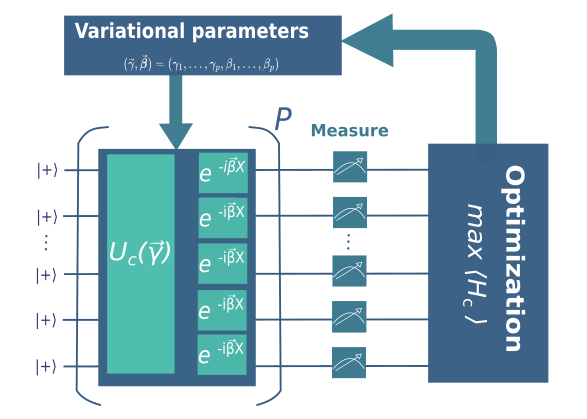
<center>Figure 1. Schematic of a Quantum Approximation Optimization Algorithm [2].  </center>



# <a class="anchor" id="Maxcut"> </a>Max-Cut

A Max-Cut problem involves partitioning nodes of a graph into two sets, such that the number of edges between the sets is maximum.

## MaxCut solution

Using a general library as matplotlib/plotly to design the plots that we use to show our results. Numpy for mathematical operations and networkx to plot a graph

In [4]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import networkx as nx

The problem is initialized using a method with 5 nodes to which the Max-Cut will be applied

In [5]:
# Design the graph for the  maxcut problem 

g = nx.Graph()
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 4)
g.add_edge(3, 4)

Using methods implemented in OpenQAOA to perform the Max-Cut problem applied in a quantum algorithm.

In [6]:
#import problem classes from OQ for easy problem creation
from openqaoa.problems.problem import MaximumCut

#import the QAOA workflow model
from openqaoa.workflows.optimizer import QAOA

#import method to specify the device
from openqaoa.devices import create_device

# Import the method to plot the graph 
from openqaoa.utilities import plot_graph

Using the method `plot_graph` where the parameter is the object of netowrkx you can plot the graph

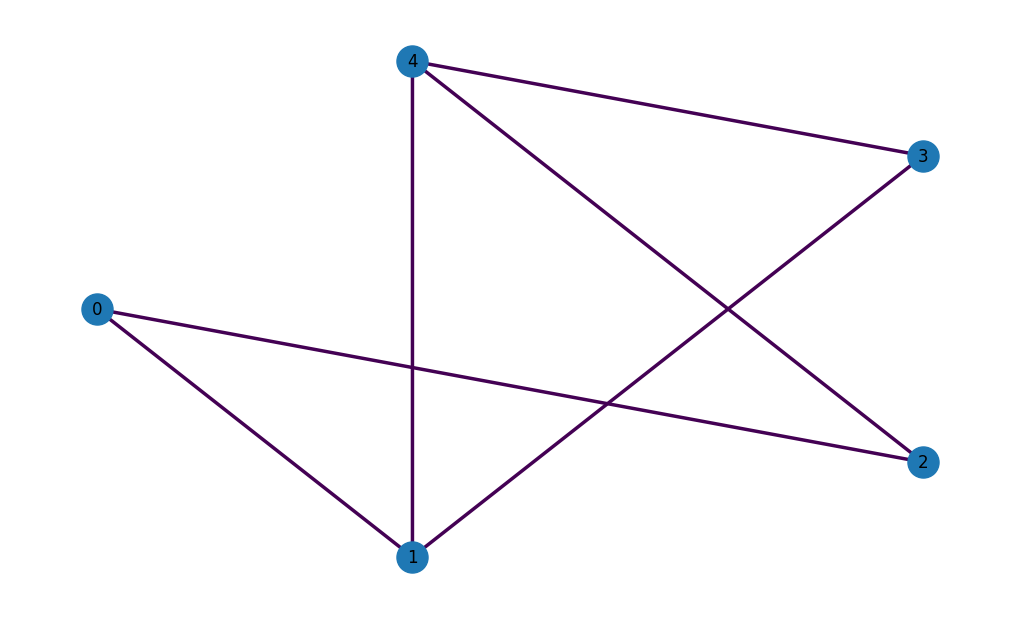

In [7]:
plot_graph(g)

<div class="alert alert-info"> 
The Max-Cut problem involves partitioning nodes of a graph into two sets, such that the number of edges between the sets is maximum.
    
</div>


It can be expressed as a bitstring where the index is the node number and the value 1 means that it is selected and 0 means that it is not selected for that subset.



<table  style="width:80%;color: white;">
    <thead >
        <tr style=" background-color: #2f3974;">
            <th>Solution </th>
            <th> Solution</th>
            <th> Output states</th>
        </tr>
    </thead>
    <tbody>
        <tr style=" background-color: #4fbeae;">
            <td>1</td>
            <td>[[0,4],[1,2,3]]</td>
            <td>[[10001],[01110]] </td>
        </tr>
        <tr style=" background-color: #4fbeae;">
            <td>2</td>
            <td>[[1,2],[0,3,4]]</td>
            <td>[[01100],[10011]] </td>
        </tr>
    </tbody>
 </table>

<center>Table 1. Description of the classical solution for the MaxCut problem example</center>

Graphically it can be divided into two possible solutions as shown in Figure 2.


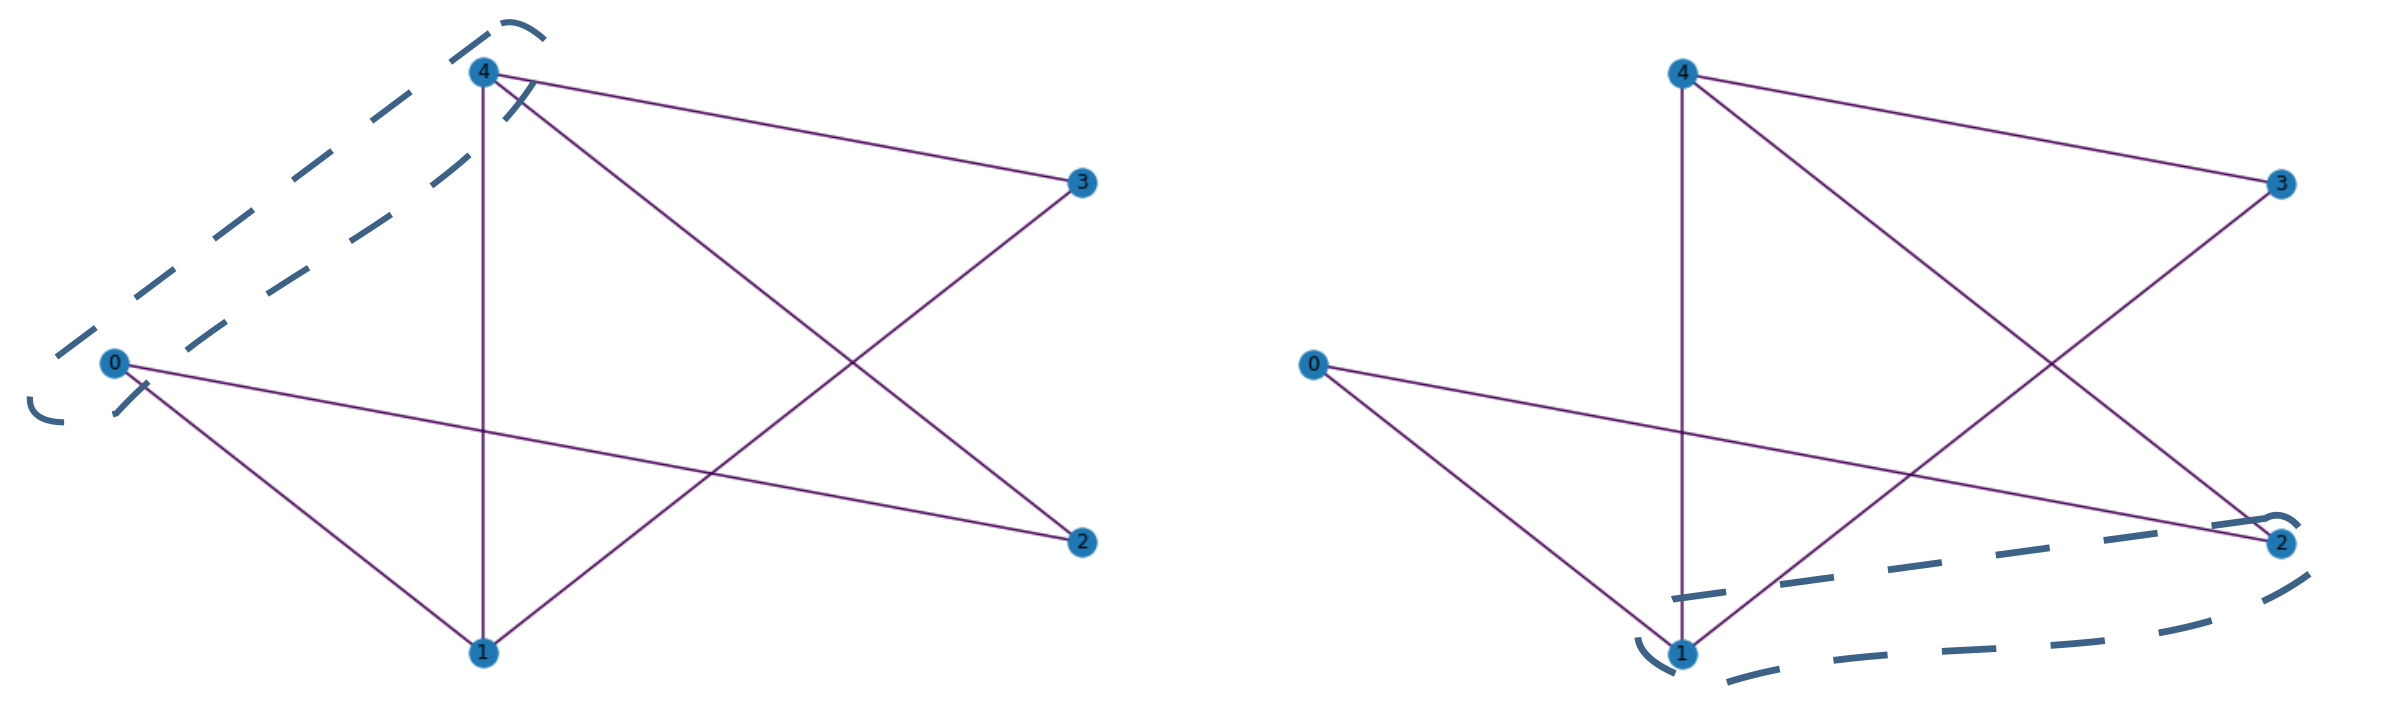
<center>Figure 2. solution for the Maxcut problem. </center>


##  Max-Cut problem to QAOA

In order to work the problem you want to design you must convert it to QUBO format. That is possible using the Class *MaximumCut*, where this has one parameter, the networkx object, *g* , one object of this class has the method `get_pubo_problem()`, that translates the problem into a QUBO problem.

In [8]:
#Use the MaximumCut class to instantiate the problem.
maxcut_prob = MaximumCut(g)

# The binary values can be access via the `asdict()` method.
maxcut_qubo = maxcut_prob.get_qubo_problem()
maxcut_qubo.asdict()

{'terms': [[0, 1], [0, 2], [1, 3], [1, 4], [2, 4], [3, 4]],
 'weights': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'constant': 0,
 '_n': 5}

## QAOA object

At this point, must be instantiate an QAOA object from OpenQAOA to connect the QUBO in the quantum algortihm

In [9]:
# init the object QAOA for default the backend is vectorised
q = QAOA()

If you can check the different backend you can use the local simulators or the cloud providers using the next methods

In [10]:
q.local_simulators, q.cloud_provider

(['qiskit.qasm_simulator',
  'qiskit.shot_simulator',
  'qiskit.statevector_simulator',
  'vectorized',
  'pyquil.statevector_simulator'],
 [openqaoa.devices.DeviceQiskit,
  openqaoa.devices.DevicePyquil,
  openqaoa.devices.DeviceAWS])

### Select a device

In OpenQAOA you can use different devices either local or from different cloud backends such as Qiskit, Pyquil. For this example the **vectorized** backend is initially configured.

In [11]:
from openqaoa.devices import create_device
sim = create_device(location='local', name='vectorized')

after that you can configurate the object QAOA with the device that you specified previously called *sim*

In [12]:
q.set_device(sim)

### Compile the QUBO

When you can the QUBO of the problem that you want optimize and the QAOA object. The next step to compile it. After a successful compilation it will show the features in which the QAOA object is found. 

In [13]:
q.compile(maxcut_qubo) 

### optimize the problem

You can describe the init point o characteristics of the QAOA algorithm, for example the p value; indicathe the name of the optimizer; and the number of iterations.

In [14]:
q.optimize()

### Results

You can print different things from the QAOA object in the section `q.results` as:

- `solutions_bitstring`: The states solutions
- `bitstring_energy`: The energy from each state
- `optimized`: The statevector list
- `get_counts`: The probility of each state.
- `plot_cost`: Plot the cost value with respect the number of iteration.

you can check one example of each method i nthe next cell.

the states with more probility `most_probable_states`

In [15]:
q.results.most_probable_states['solutions_bitstrings']

['01100', '10011']

You can print the energy of the states with more probility `most_probable_states`

In [16]:
q.results.most_probable_states['bitstring_energy']

-4.0

Is possible print the dictionary of the last iteration for each state in the quantum circuit  `get_counts`

In [17]:
q.results.get_counts(q.results.optimized['optimized measurement outcomes'])

{'00000': 0.004646529937495352,
 '10000': 0.00210609125363457,
 '01000': 0.008265634005129783,
 '11000': 0.030763938069037284,
 '00100': 0.002106091253634574,
 '10100': 0.004923407953247805,
 '01100': 0.1036933309634003,
 '11100': 0.01740299920445808,
 '00010': 0.0013148887194658163,
 '10010': 0.0479003639316631,
 '01010': 0.017402999204458088,
 '11010': 0.030763938069037274,
 '00110': 0.04790036393166314,
 '10110': 0.06885045853514406,
 '01110': 0.10369333096340028,
 '11110': 0.008265634005129786,
 '00001': 0.008265634005129786,
 '10001': 0.10369333096340028,
 '01001': 0.06885045853514406,
 '11001': 0.04790036393166314,
 '00101': 0.030763938069037274,
 '10101': 0.017402999204458088,
 '01101': 0.0479003639316631,
 '11101': 0.0013148887194658163,
 '00011': 0.01740299920445808,
 '10011': 0.1036933309634003,
 '01011': 0.004923407953247805,
 '11011': 0.002106091253634574,
 '00111': 0.030763938069037284,
 '10111': 0.008265634005129783,
 '01111': 0.00210609125363457,
 '11111': 0.004646529937

You can obtain the plot  using `plot_cost()` of the cost value in each iteration, if you want use the cost values is possible using: 

`q.results.intermediate['intermediate cost']`

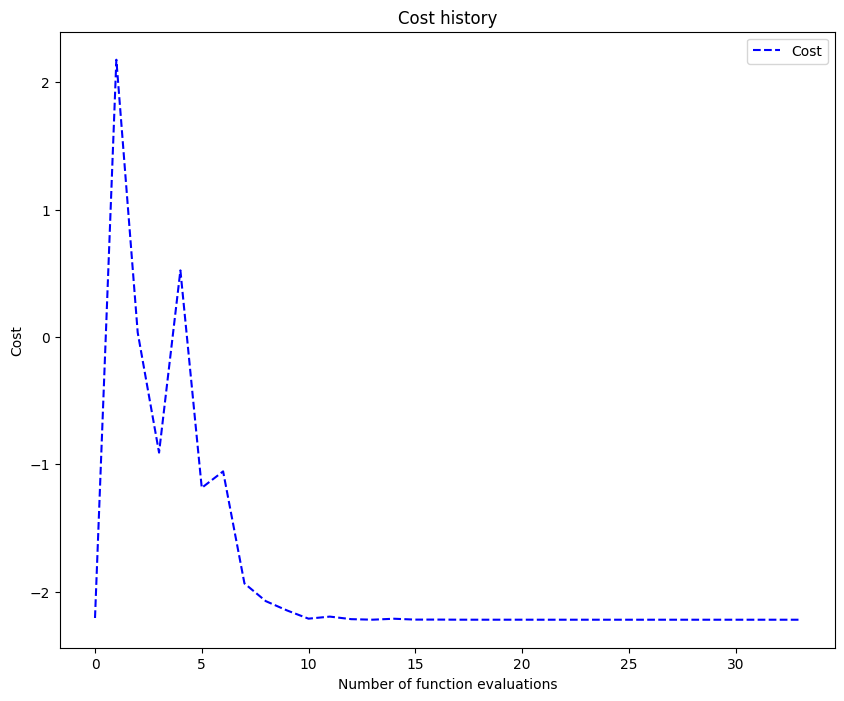

In [18]:
q.results.plot_cost()

# <a class="anchor" id="References"> </a> References

1. Farhi, Edward, Jeffrey Goldstone, and Sam Gutmann. "A quantum approximate optimization algorithm." arXiv preprint arXiv:1411.4028 (2014).

2. Zhou, Leo & Wang, Sheng-Tao & Choi, Soonwon & Pichler, Hannes & Lukin, Mikhail. (2020). Quantum Approximate Optimization Algorithm: Performance, Mechanism, and Implementation on Near-Term Devices. Physical Review X. 10. 10.1103/PhysRevX.10.021067. 